In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
import sys

In [ ]:
basePath = "DataSet/archive_full/train/"
img_array = cv2.imread(basePath + "0/Training_3908.jpg") # Test image

In [ ]:
img_array.shape

(48, 48, 3)

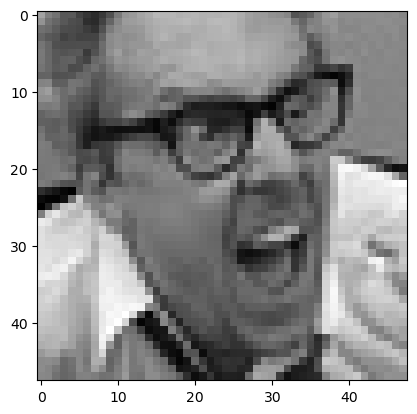

In [ ]:
plt.imshow(img_array)

In [ ]:
Classes = ["0","1","2","3","4","5","6"]
Datadirectory = basePath
print(Classes)

['0', '1', '2', '3', '4', '5', '6']


In [ ]:
# read all the images and covertin them to array

# Will have all the images
training_Data = []

def create_training_Data():
    for category in Classes:
        path = os.path.join(Datadirectory, category)
        class_num = Classes.index(category)
        print(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array, (img_size, img_size))
                training_Data.append([new_array, class_num])
            except Exception as e:
                pass

# Actually call the function, tutorial actually had 11K isntead of 27K
create_training_Data()

0
1
2
3
4
5
6


In [ ]:
print(len(training_Data))

28709


In [ ]:
import random

random.shuffle(training_Data)

In [ ]:
# 17

X = []
y = []

# features are images
# labels are labels
# training data has two elements

for features, label in training_Data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, img_size, img_size, 3) ## converting it to 4 dimension

In [ ]:
X.shape

(28709, 224, 224, 3)

In [ ]:
X = X / 255.0

In [ ]:
Y = np.array(y)

In [ ]:
Y.shape

(28709,)

In [ ]:
model = tf.keras.applications.MobileNetV2() # Pre Trained Model

In [ ]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_3[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[

 block_3_expand_relu (ReLU)  (None, 56, 56, 144)          0         ['block_3_expand_BN[0][0]']   
                                                                                                  
 block_3_pad (ZeroPadding2D  (None, 57, 57, 144)          0         ['block_3_expand_relu[0][0]'] 
 )                                                                                                
                                                                                                  
 block_3_depthwise (Depthwi  (None, 28, 28, 144)          1296      ['block_3_pad[0][0]']         
 seConv2D)                                                                                        
                                                                                                  
 block_3_depthwise_BN (Batc  (None, 28, 28, 144)          576       ['block_3_depthwise[0][0]']   
 hNormalization)                                                                                  
          

 block_6_depthwise_BN (Batc  (None, 14, 14, 192)          768       ['block_6_depthwise[0][0]']   
 hNormalization)                                                                                  
                                                                                                  
 block_6_depthwise_relu (Re  (None, 14, 14, 192)          0         ['block_6_depthwise_BN[0][0]']
 LU)                                                                                              
                                                                                                  
 block_6_project (Conv2D)    (None, 14, 14, 64)           12288     ['block_6_depthwise_relu[0][0]
                                                                    ']                            
                                                                                                  
 block_6_project_BN (BatchN  (None, 14, 14, 64)           256       ['block_6_project[0][0]']     
 ormalizat

                                                                                                  
 block_9_add (Add)           (None, 14, 14, 64)           0         ['block_8_add[0][0]',         
                                                                     'block_9_project_BN[0][0]']  
                                                                                                  
 block_10_expand (Conv2D)    (None, 14, 14, 384)          24576     ['block_9_add[0][0]']         
                                                                                                  
 block_10_expand_BN (BatchN  (None, 14, 14, 384)          1536      ['block_10_expand[0][0]']     
 ormalization)                                                                                    
                                                                                                  
 block_10_expand_relu (ReLU  (None, 14, 14, 384)          0         ['block_10_expand_BN[0][0]']  
 )        

                                                                                                  
 block_13_expand_relu (ReLU  (None, 14, 14, 576)          0         ['block_13_expand_BN[0][0]']  
 )                                                                                                
                                                                                                  
 block_13_pad (ZeroPadding2  (None, 15, 15, 576)          0         ['block_13_expand_relu[0][0]']
 D)                                                                                               
                                                                                                  
 block_13_depthwise (Depthw  (None, 7, 7, 576)            5184      ['block_13_pad[0][0]']        
 iseConv2D)                                                                                       
                                                                                                  
 block_13_

 iseConv2D)                                                                                       
                                                                                                  
 block_16_depthwise_BN (Bat  (None, 7, 7, 960)            3840      ['block_16_depthwise[0][0]']  
 chNormalization)                                                                                 
                                                                                                  
 block_16_depthwise_relu (R  (None, 7, 7, 960)            0         ['block_16_depthwise_BN[0][0]'
 eLU)                                                               ]                             
                                                                                                  
 block_16_project (Conv2D)   (None, 7, 7, 320)            307200    ['block_16_depthwise_relu[0][0
                                                                    ]']                           
          

In [ ]:
base_input = model.layers[0].input
base_output = model.layers[-2].output
base_output

<KerasTensor: shape=(None, 1280) dtype=float32 (created by layer 'global_average_pooling2d_2')>

In [ ]:
final_output = layers.Dense(128)(base_output) # adding new layer, after the output of global pooling player
final_output = layers.Activation('relu')(final_output) # activation function
final_output = layers.Dense(64)(final_output) #
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(7, activation='softmax')(final_output) # my classes are 07, classification layer

In [ ]:
final_output # output

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'dense_5')>

In [ ]:
new_model = keras.Model(inputs = base_input, outputs = final_output)
new_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_3[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[0][0]']      

 block_3_expand_relu (ReLU)  (None, 56, 56, 144)          0         ['block_3_expand_BN[0][0]']   
                                                                                                  
 block_3_pad (ZeroPadding2D  (None, 57, 57, 144)          0         ['block_3_expand_relu[0][0]'] 
 )                                                                                                
                                                                                                  
 block_3_depthwise (Depthwi  (None, 28, 28, 144)          1296      ['block_3_pad[0][0]']         
 seConv2D)                                                                                        
                                                                                                  
 block_3_depthwise_BN (Batc  (None, 28, 28, 144)          576       ['block_3_depthwise[0][0]']   
 hNormalization)                                                                                  
          

 block_6_depthwise_BN (Batc  (None, 14, 14, 192)          768       ['block_6_depthwise[0][0]']   
 hNormalization)                                                                                  
                                                                                                  
 block_6_depthwise_relu (Re  (None, 14, 14, 192)          0         ['block_6_depthwise_BN[0][0]']
 LU)                                                                                              
                                                                                                  
 block_6_project (Conv2D)    (None, 14, 14, 64)           12288     ['block_6_depthwise_relu[0][0]
                                                                    ']                            
                                                                                                  
 block_6_project_BN (BatchN  (None, 14, 14, 64)           256       ['block_6_project[0][0]']     
 ormalizat

                                                                                                  
 block_9_add (Add)           (None, 14, 14, 64)           0         ['block_8_add[0][0]',         
                                                                     'block_9_project_BN[0][0]']  
                                                                                                  
 block_10_expand (Conv2D)    (None, 14, 14, 384)          24576     ['block_9_add[0][0]']         
                                                                                                  
 block_10_expand_BN (BatchN  (None, 14, 14, 384)          1536      ['block_10_expand[0][0]']     
 ormalization)                                                                                    
                                                                                                  
 block_10_expand_relu (ReLU  (None, 14, 14, 384)          0         ['block_10_expand_BN[0][0]']  
 )        

                                                                                                  
 block_13_expand_relu (ReLU  (None, 14, 14, 576)          0         ['block_13_expand_BN[0][0]']  
 )                                                                                                
                                                                                                  
 block_13_pad (ZeroPadding2  (None, 15, 15, 576)          0         ['block_13_expand_relu[0][0]']
 D)                                                                                               
                                                                                                  
 block_13_depthwise (Depthw  (None, 7, 7, 576)            5184      ['block_13_pad[0][0]']        
 iseConv2D)                                                                                       
                                                                                                  
 block_13_

 iseConv2D)                                                                                       
                                                                                                  
 block_16_depthwise_BN (Bat  (None, 7, 7, 960)            3840      ['block_16_depthwise[0][0]']  
 chNormalization)                                                                                 
                                                                                                  
 block_16_depthwise_relu (R  (None, 7, 7, 960)            0         ['block_16_depthwise_BN[0][0]'
 eLU)                                                               ]                             
                                                                                                  
 block_16_project (Conv2D)   (None, 7, 7, 320)            307200    ['block_16_depthwise_relu[0][0
                                                                    ]']                           
          

In [ ]:
new_model.compile(loss="sparse_categorical_crossentropy", optimizer = "adam", metrics=["accuracy"])

In [ ]:
Y[7000]

0

In [ ]:
new_model.fit(X,Y, epochs = 25)
new_model.save('mod_my_model_94p69.h5')

Epoch 1/25
898/898 [==============================] - 1396s 2s/step - loss: 1.2555 - accuracy: 0.5231
Epoch 2/25
898/898 [==============================] - 1381s 2s/step - loss: 1.0792 - accuracy: 0.5957
Epoch 3/25
898/898 [==============================] - 1386s 2s/step - loss: 0.9967 - accuracy: 0.6250
Epoch 4/25
898/898 [==============================] - 1398s 2s/step - loss: 0.9409 - accuracy: 0.6511
Epoch 5/25
898/898 [==============================] - 1399s 2s/step - loss: 0.8890 - accuracy: 0.6698
Epoch 6/25
898/898 [==============================] - 1401s 2s/step - loss: 0.8345 - accuracy: 0.6901
Epoch 7/25
898/898 [==============================] - 1409s 2s/step - loss: 0.7887 - accuracy: 0.7093
Epoch 8/25
898/898 [==============================] - 1415s 2s/step - loss: 0.7355 - accuracy: 0.7299
Epoch 9/25
898/898 [==============================] - 1417s 2s/step - loss: 0.6777 - accuracy: 0.7526
Epoch 10/25
898/898 [==============================] - 1416s 2s/step - loss: 0.630

C:\Users\OmeNas\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
new_model.save('Final_my_model_94p69.keras')

NameError: name 'new_model' is not defined

In [ ]:
new_model = tf.keras.models.load_model('Final_my_model_94p69.keras')

In [ ]:
frame = cv2.imread("surprise2.jpg")

In [ ]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
print(faceCascade.empty())

False


In [ ]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

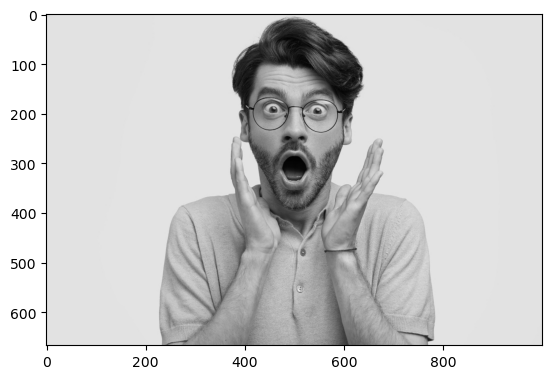

In [ ]:
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

In [ ]:
faces = faceCascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in faces:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = frame[y:y+h, x:x+w]
    cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
    facess = faceCascade.detectMultiScale(roi_gray)
    if len(facess) == 0:
        print("Face not detected")
    else:
        for (ex, ey, ew, eh) in facess:
            face_roi = roi_color[ey: ey+eh, ex:ex + ew]

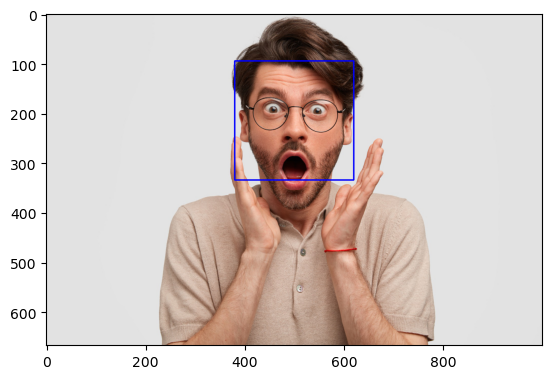

In [ ]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

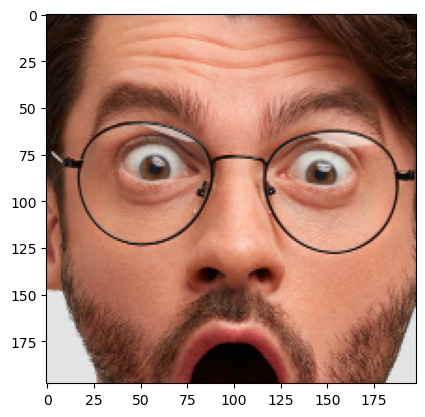

In [ ]:
plt.imshow(cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB))

In [ ]:
final_image = cv2.resize(face_roi, (224, 224))
final_image = np.expand_dims(final_image, axis = 0)
final_image = final_image / 255.0 # normalizing

In [ ]:
Predictions = new_model.predict(final_image)

1/1 [==============================] - 0s 53ms/step


In [ ]:
Predictions[0]

array([9.7263580e-07, 1.5134866e-06, 5.2661751e-03, 7.2910939e-07,
       4.4941849e-08, 5.3803127e-08, 9.9473047e-01], dtype=float32)

In [ ]:
np.argmax(Predictions)

6

In [ ]:
import cv2
path = "haarcascade_frontalface_default.xml"
font_scale = 1.5
font = cv2.FONT_HERSHEY_PLAIN

# set the rectangle background to white
rectangle_bgr = (255, 255, 255)

# make a black image
img = np.zeros((500, 500))

#set some text
text = "Some text in a box!"

#get the width and height of the text box
(text_width, text_height) = cv2.getTextSize(text, font, fontScale=font_scale, thickness=1)[0]

#set the text start position
text_offset_x = 10
text_offset_y = img.shape[0] - 25

#make the coordsof the box with a small padding of two pixels
box_coords = ((text_offset_x, text_offset_y), (text_offset_x + text_width + 2, text_offset_y - text_height - 2))
cv2.rectangle(img, box_coords[0], box_coords[1], rectangle_bgr, cv2.FILLED)
cv2.putText(img, text, (text_offset_x, text_offset_y), font, fontScale=font_scale, color=(0,0,0), thickness=1)

cap = cv2.VideoCapture(1)
#Check if the webcam is opened correctly
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")
while True:
    ret, frame = cap.read()
    #eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
    faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    #print(faceCascade.empty())
    faces = faceCascade.detectMultiScale(gray,1.1,4)
    for x,y,w,h in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (x,y), (x+w, y+h), (255,0,0), 2)
        facess = faceCascade.detectMultiScale(roi_gray)
        if len(facess) == 0:
            print("Face not detected")
        else:
            for (ex, ey, ew, eh) in facess:
                face_roi = roi_color[ey: ey + eh, ex: ex + ew] ## cropping the face

    final_image = cv2.resize(face_roi, (224,224))
    final_image = np.expand_dims(final_image, axis = 0) # need fourth dimension
    final_image = final_image / 225.0

    font = cv2.FONT_HERSHEY_SIMPLEX

    Predictions = new_model.predict(final_image)

    font_scale = 1.5
    font = cv2.FONT_HERSHEY_PLAIN

    if (np.argmax(Predictions) == 0):
        status = "Angry"

        x1,y1,w1,h1 = 0,0,175,75

        #draw black backgorund rectangle
        cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0,0,0), -1)

        #Add Text
        cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)

        cv2.putText(frame, status,(100, 150), font, 3, (0,0,225),2,cv2.LINE_4)


    elif (np.argmax(Predictions) == 1):
        status = "Disgust"

        x1,y1,w1,h1 = 0,0,175,75

        #draw black backgorund rectangle
        cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0,0,0), -1)

        #Add Text
        cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)

        cv2.putText(frame, status,(100, 150), font, 3, (0,0,225),2,cv2.LINE_4)

        cv2.rectangle(frame, (x,y), (x+w, y+h), (0,0,255))

    elif (np.argmax(Predictions) == 2):
        status = "Fear"

        x1,y1,w1,h1 = 0,0,175,75

        #draw black backgorund rectangle
        cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0,0,0), -1)

        #Add Text
        cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)

        cv2.putText(frame, status,(100, 150), font, 3, (0,0,225),2,cv2.LINE_4)

        cv2.rectangle(frame, (x,y), (x+w, y+h), (0,0,255))

    elif (np.argmax(Predictions) == 3):
        status = "Happy"

        x1,y1,w1,h1 = 0,0,175,75

        #draw black backgorund rectangle
        cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0,0,0), -1)

        #Add Text
        cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)

        cv2.putText(frame, status,(100, 150), font, 3, (0,0,225),2,cv2.LINE_4)

        cv2.rectangle(frame, (x,y), (x+w, y+h), (0,0,255))

    elif (np.argmax(Predictions) == 4):
        status = "Sad"

        x1,y1,w1,h1 = 0,0,175,75

        #draw black backgorund rectangle
        cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0,0,0), -1)

        #Add Text
        cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)

        cv2.putText(frame, status,(100, 150), font, 3, (0,0,225),2,cv2.LINE_4)

        cv2.rectangle(frame, (x,y), (x+w, y+h), (0,0,255))

    elif (np.argmax(Predictions) == 5):
        status = "Surprise"

        x1,y1,w1,h1 = 0,0,175,75

        #draw black backgorund rectangle
        cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0,0,0), -1)

        #Add Text
        cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)

        cv2.putText(frame, status,(100, 150), font, 3, (0,0,225),2,cv2.LINE_4)

        cv2.rectangle(frame, (x,y), (x+w, y+h), (0,0,255))
    else:
        status = "Neutral"

        x1,y1,w1,h1 = 0,0,175,75

        #draw black backgorund rectangle
        cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0,0,0), -1)

        #Add Text
        cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,255,0), 2)

        cv2.putText(frame, status,(100, 150), font, 3, (0,225,0),2,cv2.LINE_4)

        cv2.rectangle(frame, (x,y), (x+w, y+h), (0,255,0))

    #gray = cv2.cvtColor(frame, cvt.COLOR_BGR2GRAY)
    #print(faceCascade.empty())
    #faces = faceCascade.detectMultiScale(gray,1.1,4)

    #Draw a rectangle around the face
    #for(x,y,w,h) in faces:
    # cv2.rectangle(frame, (x,y), (x+w, y+h), (0, 255, 0), 2)



    # Use putText method for
    # inserting text on video
    cv2.imshow("Face Emotion Recognition", frame)

    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 29ms/step
Face not detected
1/1 [==============================] - 0s 28ms/step
Face not detected
1/1 [==============================] - 0s 29ms/step
Face not detected
1/1 [==============================] - 0s 29ms/step
Face not detected
1/1 [==============================] - 0s 29ms/step
Face not detected
1/1 [==============================] - 0s 28ms/step
Face not detected
1/1 [==============================] - 0s 28ms/step
Face not detected
1/1 [==============================] - 0s 31ms/step
Face not detected
1/1 [==============================] - 0s 30ms/step
Face not detected
1/1 [==============================] - 0s 29ms/step
Face not detected
1/1 [==============================] - 0s 30ms/step
Face not detected
1/1 [==============================] - 0s 28ms/step
Face not detected
1/1 [==============================] - 0s 31ms/step
Face not detected
1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 28ms/step
Face not detected
1/1 [==============================] - 0s 29ms/step
Face not detected
1/1 [==============================] - 0s 34ms/step
Face not detected
1/1 [==============================] - 0s 29ms/step
Face not detected
1/1 [==============================] - 0s 29ms/step
Face not detected
1/1 [==============================] - 0s 28ms/step
Face not detected
1/1 [==============================] - 0s 28ms/step
Face not detected
1/1 [==============================] - 0s 28ms/step
Face not detected
1/1 [==============================] - 0s 32ms/step
Face not detected
1/1 [==============================] - 0s 28ms/step
Face not detected
1/1 [==============================] - 0s 28ms/step
Face not detected
1/1 [==============================] - 0s 28ms/step
Face not detected
1/1 [==============================] - 0s 29ms/step
Face not detected
1/1 [==============================] - 0s 32ms/step
Face not detected
1/1 [===============

1/1 [==============================] - 0s 30ms/step
Face not detected
1/1 [==============================] - 0s 29ms/step
Face not detected
1/1 [==============================] - 0s 29ms/step
Face not detected
1/1 [==============================] - 0s 33ms/step
Face not detected
1/1 [==============================] - 0s 30ms/step
Face not detected
1/1 [==============================] - 0s 29ms/step
Face not detected
1/1 [==============================] - 0s 29ms/step
Face not detected
1/1 [==============================] - 0s 29ms/step
Face not detected
1/1 [==============================] - 0s 29ms/step
Face not detected
1/1 [==============================] - 0s 29ms/step
Face not detected
1/1 [==============================] - 0s 29ms/step
Face not detected
1/1 [==============================] - 0s 29ms/step
Face not detected
1/1 [==============================] - 0s 32ms/step
Face not detected
1/1 [==============================] - 0s 28ms/step
Face not detected
1/1 [===============

1/1 [==============================] - 0s 28ms/step
Face not detected
1/1 [==============================] - 0s 37ms/step
Face not detected
1/1 [==============================] - 0s 28ms/step
Face not detected
1/1 [==============================] - 0s 28ms/step
Face not detected
1/1 [==============================] - 0s 28ms/step
Face not detected
1/1 [==============================] - 0s 28ms/step
Face not detected
1/1 [==============================] - 0s 31ms/step
Face not detected
1/1 [==============================] - 0s 28ms/step
Face not detected
1/1 [==============================] - 0s 27ms/step
Face not detected
1/1 [==============================] - 0s 28ms/step
Face not detected
1/1 [==============================] - 0s 29ms/step
Face not detected
1/1 [==============================] - 0s 32ms/step
Face not detected
1/1 [==============================] - 0s 29ms/step
Face not detected
1/1 [==============================] - 0s 29ms/step
Face not detected
1/1 [===============

1/1 [==============================] - 0s 29ms/step
Face not detected
1/1 [==============================] - 0s 30ms/step
Face not detected
1/1 [==============================] - 0s 30ms/step
Face not detected
1/1 [==============================] - 0s 32ms/step
Face not detected
1/1 [==============================] - 0s 29ms/step
Face not detected
1/1 [==============================] - 0s 29ms/step
Face not detected
1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 32ms/step
Face not detected
1/1 [==============================] - 0s 34ms/step
Face not detected
1/1 [==============================] - 0s 35ms/step
Face not detected
1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 34ms/step
Face not detected
1/1 [==============================] - 0s 32ms/step
Face not detected
1/1 [==============================] - 0s 34ms/step
Face not detected
1/1 [==============================] - 0s 34ms/step
Face not detected
1/1 [==============================] - 0s 35ms/step
Face not detected
1/1 [==============================] - 0s 34ms/step
Face not detected
1/1 [==============================] - 0s 33ms/step
Face not detected
1/1 [==============================] - 0s 32ms/step
Face not detected
1/1 [==============================] - 0s 34ms/step
Face not detected
1/1 [==============================] - 0s 35ms/step
Face not detected
1/1 [==============================] - 0s 35ms/step
Face not detected
1/1 [==============================] - 0s 32ms/step
Face not detected
1/1 [==============================] - 0s 34ms/step
Face not detected
1/1 [==============================] - 0s 32ms/step
Face not detected
1/1 [===============

1/1 [==============================] - 0s 33ms/step
Face not detected
1/1 [==============================] - 0s 32ms/step
Face not detected
1/1 [==============================] - 0s 32ms/step
Face not detected
1/1 [==============================] - 0s 36ms/step
Face not detected
1/1 [==============================] - 0s 33ms/step
Face not detected
1/1 [==============================] - 0s 32ms/step
Face not detected
1/1 [==============================] - 0s 33ms/step
Face not detected
1/1 [==============================] - 0s 31ms/step
Face not detected
1/1 [==============================] - 0s 33ms/step
Face not detected
1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 34ms/step
Face not detected
1/1 [==============================] - 0s 34ms/step
Face not detected
1/1 [==============================] - 0s 33ms/step
Face not detected
1/1 [==============================] - 0s 34ms/step
Face not detected
1/1 [==============================] - 0s 35ms/step
Face not detected
1/1 [==============================] - 0s 33ms/step
Face not detected
1/1 [==============================] - 0s 35ms/step
Face not detected
1/1 [==============================] - 0s 33ms/step
Face not detected
1/1 [==============================] - 0s 34ms/step
Face not detected
1/1 [==============================] - 0s 33ms/step
Face not detected
Face not detected
1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - 0s 35ms/step
Face not detected
1/1 [==============================] - 0s 38ms/step
Face not detected
1/1 [==============================] - 0s 37ms/step
Face not detected
1/1 [==============================] - 0s 34ms/step
Face not detected
1/1 [==============================] - 0s 34ms/step
Face not detected
1/1 [==============================] - 0s 34ms/step
Face not detected
1/1 [==============================] - 0s 34ms/step
Face not detected
1/1 [==============================] - 0s 35ms/step
Face not detected
1/1 [==============================] - 0s 34ms/step
Face not detected
1/1 [==============================] - 0s 34ms/step
Face not detected
1/1 [==============================] - 0s 35ms/step
Face not detected
1/1 [==============================] - 0s 34ms/step
Face not detected
1/1 [==============================] - 0s 35ms/step
Face not detected
1/1 [==============================] - 0s 37ms/step
Face not detected
Face not detected
1/

1/1 [==============================] - 0s 39ms/step
Face not detected
1/1 [==============================] - 0s 37ms/step
Face not detected
1/1 [==============================] - 0s 34ms/step
Face not detected
1/1 [==============================] - 0s 35ms/step
Face not detected
1/1 [==============================] - 0s 37ms/step
Face not detected
1/1 [==============================] - 0s 34ms/step
Face not detected
1/1 [==============================] - 0s 34ms/step
Face not detected
1/1 [==============================] - 0s 35ms/step
Face not detected
1/1 [==============================] - 0s 35ms/step
Face not detected
1/1 [==============================] - 0s 35ms/step
Face not detected
1/1 [==============================] - 0s 36ms/step
Face not detected
1/1 [==============================] - 0s 37ms/step
Face not detected
Face not detected
1/1 [==============================] - 0s 36ms/step
Face not detected
1/1 [==============================] - 0s 35ms/step
Face not detected
Fa

1/1 [==============================] - 0s 36ms/step
Face not detected
1/1 [==============================] - 0s 34ms/step
Face not detected
1/1 [==============================] - 0s 35ms/step
Face not detected
Face not detected
1/1 [==============================] - 0s 36ms/step
Face not detected
Face not detected
1/1 [==============================] - 0s 36ms/step
Face not detected
1/1 [==============================] - 0s 36ms/step
Face not detected
Face not detected
1/1 [==============================] - 0s 35ms/step
Face not detected
Face not detected
1/1 [==============================] - 0s 35ms/step
Face not detected
1/1 [==============================] - 0s 36ms/step
Face not detected
1/1 [==============================] - 0s 37ms/step
Face not detected
1/1 [==============================] - 0s 37ms/step
Face not detected
1/1 [==============================] - 0s 38ms/step
Face not detected
1/1 [==============================] - 0s 37ms/step
Face not detected
1/1 [=============

1/1 [==============================] - 0s 41ms/step
Face not detected
1/1 [==============================] - 0s 38ms/step
Face not detected
1/1 [==============================] - 0s 38ms/step
Face not detected
1/1 [==============================] - 0s 38ms/step
Face not detected
1/1 [==============================] - 0s 43ms/step
Face not detected
1/1 [==============================] - 0s 39ms/step
Face not detected
1/1 [==============================] - 0s 38ms/step
Face not detected
1/1 [==============================] - 0s 38ms/step
Face not detected
1/1 [==============================] - 0s 38ms/step
Face not detected
1/1 [==============================] - 0s 38ms/step
Face not detected
1/1 [==============================] - 0s 39ms/step
Face not detected
1/1 [==============================] - 0s 38ms/step
Face not detected
1/1 [==============================] - 0s 40ms/step
Face not detected
1/1 [==============================] - 0s 38ms/step
Face not detected
1/1 [===============

1/1 [==============================] - 0s 40ms/step
Face not detected
1/1 [==============================] - 0s 40ms/step
Face not detected
1/1 [==============================] - 0s 40ms/step
Face not detected
1/1 [==============================] - 0s 41ms/step
Face not detected
1/1 [==============================] - 0s 41ms/step
Face not detected
1/1 [==============================] - 0s 42ms/step
Face not detected
1/1 [==============================] - 0s 40ms/step
Face not detected
1/1 [==============================] - 0s 42ms/step
Face not detected
1/1 [==============================] - 0s 40ms/step
Face not detected
1/1 [==============================] - 0s 40ms/step
Face not detected
1/1 [==============================] - 0s 45ms/step
Face not detected
1/1 [==============================] - 0s 47ms/step
Face not detected
1/1 [==============================] - 0s 40ms/step


1/1 [==============================] - 0s 40ms/step
Face not detected
1/1 [==============================] - 0s 40ms/step
Face not detected
1/1 [==============================] - 0s 41ms/step
Face not detected
1/1 [==============================] - 0s 39ms/step
Face not detected
1/1 [==============================] - 0s 42ms/step
Face not detected
Face not detected
1/1 [==============================] - 0s 40ms/step
Face not detected
1/1 [==============================] - 0s 41ms/step
Face not detected
1/1 [==============================] - 0s 40ms/step
Face not detected
Face not detected
1/1 [==============================] - 0s 40ms/step
Face not detected
1/1 [==============================] - 0s 40ms/step
Face not detected
1/1 [==============================] - 0s 43ms/step
Face not detected
1/1 [==============================] - 0s 40ms/step
Face not detected
1/1 [==============================] - 0s 41ms/step
Face not detected
1/1 [==============================] - 0s 41ms/step
Fa

1/1 [==============================] - 0s 42ms/step
Face not detected
1/1 [==============================] - 0s 41ms/step
Face not detected
1/1 [==============================] - 0s 44ms/step
Face not detected
1/1 [==============================] - 0s 42ms/step
Face not detected
1/1 [==============================] - 0s 42ms/step
Face not detected
1/1 [==============================] - 0s 42ms/step


1/1 [==============================] - 0s 43ms/step
Face not detected
1/1 [==============================] - 0s 51ms/step


1/1 [==============================] - 0s 42ms/step


1/1 [==============================] - 0s 42ms/step
Face not detected
1/1 [==============================] - 0s 43ms/step
Face not detected
1/1 [==============================] - 0s 44ms/step
Face not detected
1/1 [==============================] - 0s 44ms/step
Face not detected
1/1 [==============================] - 0s 55ms/step
Face not detected
1/1 [==============================] - 0s 44ms/step
Face not detected
1/1 [==============================] - 0s 45ms/step
Face not detected
1/1 [==============================] - 0s 44ms/step
Face not detected


1/1 [==============================] - 0s 47ms/step
Face not detected
1/1 [==============================] - 0s 52ms/step
Face not detected
1/1 [==============================] - 0s 52ms/step
Face not detected
1/1 [==============================] - 0s 54ms/step
Face not detected
1/1 [==============================] - 0s 54ms/step
Face not detected
1/1 [==============================] - 0s 53ms/step
